In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
prefix_species="48HRS"
species="48HRS"
## heatmap threshold
high=3
low=-3

#Set font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = "Arial"
#Make pdf editable for illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
#3. Volcano plot
import math
#3.0 Get matrix
##Import data
path = "stats/"+"H2O_"+prefix_species+"_rm_exp_matrix_OK.csv"
df = pd.read_csv(path, header=0, index_col=0)
path = "stats/"+"H2O_"+prefix_species+"_rm_exp_matrix_padj.csv"
df_padj = pd.read_csv(path, header=0, index_col=0)
path = "stats/"+"H2O_"+prefix_species+"_rm_exp_matrix_sig.csv"
df_sig = pd.read_csv(path, header=0, index_col=0)

In [3]:
#3.1 Get matrix -- ISG
topic = "interferon_stimulated_genes_refined"
topic_sum = "ISG"
##Import data
path = "stats_story/"+"H2O_"+prefix_species+"_exp_"+topic+".csv"
df_topic = pd.read_csv(path, header=0, index_col=0)
path = "stats_story/"+"H2O_"+prefix_species+"_exp_"+topic+"_padj.csv"
df_topic_padj = pd.read_csv(path, header=0, index_col=0)
path = "stats_story/"+"H2O_"+prefix_species+"_exp_"+topic+"_sig.csv"
df_topic_sig = pd.read_csv(path, header=0, index_col=0)
path="Docs/Targeted_analyses_"+topic+".csv"
df_topic_cat = pd.read_csv(path, header=0, index_col=0)
##Get list -- ISG
topic_list = df_topic.index.values.tolist()

/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

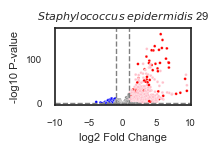

In [4]:
#3.2 Volcano plot for single microbe
##Get single microbe matrix
m1 = "48HRS-" + "STAPHYLOCOCCUS_EPIDERMIDIS__29"
m = m1
df_work = df.copy()
df_work_sig = df_sig.copy()
df_work_padj = df_padj.copy()
workm = df_work[m]
workm.rename("Log2FC", inplace=True)
workm_sig = df_work_sig[m].values.tolist()
workm_name = df_work_sig.index.values.tolist()
workm_sigr= []
i = 0
while i < len(workm_sig):
    xsig = workm_sig[i]
    xname = workm_name[i]
    if xname in topic_list:
        workm_sigr.append(topic_sum)
    elif xsig == 1:
        workm_sigr.append("Up")
    elif xsig == 0:
        workm_sigr.append("Not")
    elif xsig == -1:
        workm_sigr.append("Down")
    i += 1
workm_sigr2 = pd.Series(workm_sigr, index=workm.index.values.tolist(), name="significance")
workm_padj = df_work_padj[m].values.tolist()
workm_padjr = [-math.log(x,10) for x in workm_padj]
workm_padjrlim = []
lim=8
for x in workm_padjr:
    if x >= lim:
        workm_padjrlim.append(lim)
    else:
        workm_padjrlim.append(x)
workm_padjrlim = workm_padjr
workm_padjr2 = pd.Series(workm_padjrlim, index=workm.index.values.tolist(), name="mlog10_padj")
#workm_padj.rename("padj", inplace=True)
df_m = pd.concat([workm, workm_padjr2, workm_sigr2], axis=1)
df_m1 = df_m.copy()

##Volcano plot visualization
topic_mic = "Staphylococcus epidermidis"
topic_mic_num = "29"
df_work = df_m1.copy()
sns.set(style="white")
sns.set_context({"figure.figsize":(1.75,1)})
plot = sns.scatterplot(data=df_work,
                       x="Log2FC", y="mlog10_padj", hue="significance",
                       s=4,
                       legend=False,
                       palette=["grey","blue", "pink", "red"])
## customize
plot.set(xlim=(-10,10),ylim=(-3,170))
plot.axhline(1.3, linewidth=1, color="grey", linestyle = '--')
plot.axvline(-1, linewidth=1, color="grey", linestyle = '--')
plot.axvline(1, linewidth=1, color="grey", linestyle = '--')
#plot.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
plot.tick_params(axis="x", labelsize=7)
plot.tick_params(axis="y", labelsize=7)
plt.xlabel("log2 Fold Change", size=8)
plt.ylabel("-log10 P-value", size=8)
plt.title("$\\it{Staphylococcus}$"+" "+"$\\it{epidermidis}$"+" 29", size=8)
## save to pdf
map_plot = plot.get_figure()
path = "exp_figures_volcano/"+species+"_"+topic_mic+"_"+topic_sum+"_volcano_whole.pdf"
map_plot.savefig(path, bbox_inches="tight")

/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

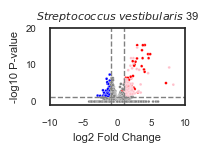

In [5]:
#3.2 Volcano plot for single microbe
##Get single microbe matrix
m2 = "48HRS-" + "STREPTOCOCCUS_VESTIBULARIS__39"
m = m2
df_work = df.copy()
df_work_sig = df_sig.copy()
df_work_padj = df_padj.copy()
workm = df_work[m]
workm.rename("Log2FC", inplace=True)
workm_sig = df_work_sig[m].values.tolist()
workm_name = df_work_sig.index.values.tolist()
workm_sigr= []
i = 0
while i < len(workm_sig):
    xsig = workm_sig[i]
    xname = workm_name[i]
    if xname in topic_list:
        workm_sigr.append(topic_sum)
    elif xsig == 1:
        workm_sigr.append("Up")
    elif xsig == 0:
        workm_sigr.append("Not")
    elif xsig == -1:
        workm_sigr.append("Down")
    i += 1
workm_sigr2 = pd.Series(workm_sigr, index=workm.index.values.tolist(), name="significance")
workm_padj = df_work_padj[m].values.tolist()
workm_padjr = [-math.log(x,10) for x in workm_padj]
workm_padjrlim = []
lim=8
for x in workm_padjr:
    if x >= lim:
        workm_padjrlim.append(lim)
    else:
        workm_padjrlim.append(x)
workm_padjrlim = workm_padjr
workm_padjr2 = pd.Series(workm_padjrlim, index=workm.index.values.tolist(), name="mlog10_padj")
#workm_padj.rename("padj", inplace=True)
df_m = pd.concat([workm, workm_padjr2, workm_sigr2], axis=1)
df_m1 = df_m.copy()

##Volcano plot visualization
topic_mic = "Streptococcus vestibularis"
topic_mic_num = "39"
df_work = df_m1.copy()
sns.set(style="white")
sns.set_context({"figure.figsize":(1.75,1)})
plot = sns.scatterplot(data=df_work,
                       x="Log2FC", y="mlog10_padj", hue="significance",
                       s=4,
                       legend=False,
                       palette=["grey","pink", "blue", "red"])

## customize
plot.set(xlim=(-10,10),ylim=(-1,20))
plot.axhline(1.3, linewidth=1, color="grey", linestyle = '--')
plot.axvline(-1, linewidth=1, color="grey", linestyle = '--')
plot.axvline(1, linewidth=1, color="grey", linestyle = '--')
#plot.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
plot.tick_params(axis="x", labelsize=7)
plot.tick_params(axis="y", labelsize=7)
plt.xlabel("log2 Fold Change", size=8)
plt.ylabel("-log10 P-value", size=8)
plt.title("$\\it{Streptococcus}$"+" "+"$\\it{vestibularis}$"+" 39", size=8)
## save to pdf
map_plot = plot.get_figure()
path = "exp_figures_volcano/"+species+"_"+topic_mic+"_"+topic_sum+"_volcano_whole.pdf"
map_plot.savefig(path, bbox_inches="tight")

/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

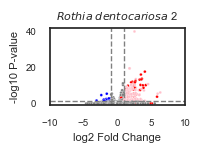

In [6]:
#3.2 Volcano plot for single microbe
##Get single microbe matrix
m3 = "48HRS-" + "ROTHIA_DENTOCARIOSA__2"
m = m3
df_work = df.copy()
df_work_sig = df_sig.copy()
df_work_padj = df_padj.copy()
workm = df_work[m]
workm.rename("Log2FC", inplace=True)
workm_sig = df_work_sig[m].values.tolist()
workm_name = df_work_sig.index.values.tolist()
workm_sigr= []
i = 0
while i < len(workm_sig):
    xsig = workm_sig[i]
    xname = workm_name[i]
    if xname in topic_list:
        workm_sigr.append(topic_sum)
    elif xsig == 1:
        workm_sigr.append("Up")
    elif xsig == 0:
        workm_sigr.append("Not")
    elif xsig == -1:
        workm_sigr.append("Down")
    i += 1
workm_sigr2 = pd.Series(workm_sigr, index=workm.index.values.tolist(), name="significance")
workm_padj = df_work_padj[m].values.tolist()
workm_padjr = [-math.log(x,10) for x in workm_padj]
workm_padjrlim = []
lim=8
for x in workm_padjr:
    if x >= lim:
        workm_padjrlim.append(lim)
    else:
        workm_padjrlim.append(x)
workm_padjrlim = workm_padjr
workm_padjr2 = pd.Series(workm_padjrlim, index=workm.index.values.tolist(), name="mlog10_padj")
#workm_padj.rename("padj", inplace=True)
df_m = pd.concat([workm, workm_padjr2, workm_sigr2], axis=1)
df_m1 = df_m.copy()

##Volcano plot visualization
topic_mic = "Rothia dentocariosa"
topic_mic_num = "2"
df_work = df_m1.copy()
sns.set(style="white")
sns.set_context({"figure.figsize":(1.75,1)})
plot = sns.scatterplot(data=df_work,
                       x="Log2FC", y="mlog10_padj", hue="significance",
                       s=4,
                       legend=False,
                       palette=["grey","pink", "blue", "red"])

## customize
plot.set(xlim=(-10,10),ylim=(-1,42))
plot.axhline(1.3, linewidth=1, color="grey", linestyle = '--')
plot.axvline(-1, linewidth=1, color="grey", linestyle = '--')
plot.axvline(1, linewidth=1, color="grey", linestyle = '--')
#plot.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
plot.tick_params(axis="x", labelsize=7)
plot.tick_params(axis="y", labelsize=7)
plt.xlabel("log2 Fold Change", size=8)
plt.ylabel("-log10 P-value", size=8)
plt.title("$\\it{Rothia}$"+" "+"$\\it{dentocariosa}$"+" 2", size=8)
## save to pdf
map_plot = plot.get_figure()
path = "exp_figures_volcano/"+species+"_"+topic_mic+"_"+topic_sum+"_volcano_whole.pdf"
map_plot.savefig(path, bbox_inches="tight")

/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

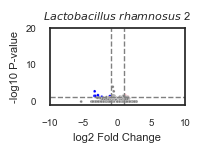

In [8]:
#3.2 Volcano plot for single microbe
##Get single microbe matrix
m4 = "48HRS-" + "LACTOBACILLUS_RHAMNOSUS__56"
m = m4
df_work = df.copy()
df_work_sig = df_sig.copy()
df_work_padj = df_padj.copy()
workm = df_work[m]
workm.rename("Log2FC", inplace=True)
workm_sig = df_work_sig[m].values.tolist()
workm_name = df_work_sig.index.values.tolist()
workm_sigr= []
i = 0
while i < len(workm_sig):
    xsig = workm_sig[i]
    xname = workm_name[i]
    if xname in topic_list:
        workm_sigr.append(topic_sum)
    elif xsig == 1:
        workm_sigr.append("Up")
    elif xsig == 0:
        workm_sigr.append("Not")
    elif xsig == -1:
        workm_sigr.append("Down")
    i += 1
workm_sigr2 = pd.Series(workm_sigr, index=workm.index.values.tolist(), name="significance")
workm_padj = df_work_padj[m].values.tolist()
workm_padjr = [-math.log(x,10) for x in workm_padj]
workm_padjrlim = []
lim=8
for x in workm_padjr:
    if x >= lim:
        workm_padjrlim.append(lim)
    else:
        workm_padjrlim.append(x)
workm_padjrlim = workm_padjr
workm_padjr2 = pd.Series(workm_padjrlim, index=workm.index.values.tolist(), name="mlog10_padj")
#workm_padj.rename("padj", inplace=True)
df_m = pd.concat([workm, workm_padjr2, workm_sigr2], axis=1)
df_m1 = df_m.copy()

##Volcano plot visualization
topic_mic = "Lactobacillus rhamnosus"
topic_mic_num = "56"
df_work = df_m1.copy()
sns.set(style="white")
sns.set_context({"figure.figsize":(1.75, 1)})
plot = sns.scatterplot(data=df_work,
                       x="Log2FC", y="mlog10_padj", hue="significance",
                       s=4,
                       legend=False,
                       palette=["grey","red", "blue", "pink"])

## customize
plot.set(xlim=(-10,10),ylim=(-1,20))
plot.axhline(1.3, linewidth=1, color="grey", linestyle = '--')
plot.axvline(-1, linewidth=1, color="grey", linestyle = '--')
plot.axvline(1, linewidth=1, color="grey", linestyle = '--')
#plot.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
plot.tick_params(axis="x", labelsize=7)
plot.tick_params(axis="y", labelsize=7)
plt.xlabel("log2 Fold Change", size=8)
plt.ylabel("-log10 P-value", size=8)
plt.title("$\\it{Lactobacillus}$"+" "+"$\\it{rhamnosus}$"+" 2", size=8)
## save to pdf
map_plot = plot.get_figure()
path = "exp_figures_volcano/"+species+"_"+topic_mic+"_"+topic_sum+"_volcano_whole.pdf"
map_plot.savefig(path, bbox_inches="tight")

/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

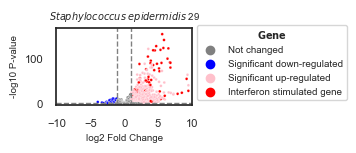

In [9]:
#3.2 Volcano plot for single microbe -- for legend
##Get single microbe matrix
m1 = "48HRS-" + "STAPHYLOCOCCUS_EPIDERMIDIS__29"
m = m1
topic_sum = "Interferon stimulated gene"
df_work = df.copy()
df_work_sig = df_sig.copy()
df_work_padj = df_padj.copy()
workm = df_work[m]
workm.rename("Log2FC", inplace=True)
workm_sig = df_work_sig[m].values.tolist()
workm_name = df_work_sig.index.values.tolist()
workm_sigr= []
i = 0
while i < len(workm_sig):
    xsig = workm_sig[i]
    xname = workm_name[i]
    if xname in topic_list:
        workm_sigr.append(topic_sum)
    elif xsig == 1:
        workm_sigr.append("Significant up-regulated")
    elif xsig == 0:
        workm_sigr.append("Not changed")
    elif xsig == -1:
        workm_sigr.append("Significant down-regulated")
    i += 1
workm_sigr2 = pd.Series(workm_sigr, index=workm.index.values.tolist(), name="significance")
workm_padj = df_work_padj[m].values.tolist()
workm_padjr = [-math.log(x,10) for x in workm_padj]
workm_padjrlim = []
lim=8
for x in workm_padjr:
    if x >= lim:
        workm_padjrlim.append(lim)
    else:
        workm_padjrlim.append(x)
workm_padjrlim = workm_padjr
workm_padjr2 = pd.Series(workm_padjrlim, index=workm.index.values.tolist(), name="mlog10_padj")
#workm_padj.rename("padj", inplace=True)
df_m = pd.concat([workm, workm_padjr2, workm_sigr2], axis=1)
df_m1 = df_m.copy()

##Volcano plot visualization
topic_mic = "Staphylococcus epidermidis"
topic_mic_num = "29"
df_work = df_m1.copy()
sns.set(style="white")
sns.set_context({"figure.figsize":(1.75, 1)})
plot = sns.scatterplot(data=df_work,
                       x="Log2FC", y="mlog10_padj", hue="significance",
                       s=4,
                       legend=True,
                       palette=["grey","blue", "pink", "red"])
## customize
plot.set(xlim=(-10,10),ylim=(-3,170))
plot.axhline(1.3, linewidth=1, color="grey", linestyle = '--')
plot.axvline(-1, linewidth=1, color="grey", linestyle = '--')
plot.axvline(1, linewidth=1, color="grey", linestyle = '--')
plot.legend(loc="lower left", bbox_to_anchor=(1, 0),
          title="$\\bf{Gene}$",
          fontsize=7, title_fontsize=7)
#plot.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
plot.tick_params(axis="x", labelsize=8)
plot.tick_params(axis="y", labelsize=8)
plt.xlabel("log2 Fold Change", size=7)
plt.ylabel("-log10 P-value", size=7)
plt.title("$\\it{Staphylococcus}$"+" "+"$\\it{epidermidis}$"+" 29", size=7)
## save to pdf
map_plot = plot.get_figure()
path = "exp_figures_volcano/for_legend_volcano_whole.pdf"
map_plot.savefig(path, bbox_inches="tight")